# Grid Independence Study

In [1]:
# Imports and physical parameters
import numpy as np
import scipy

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
from ipywidgets import *
from matplotlib.widgets import Slider

# ddg imports
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from ddgclib._particle_liquid_bridge_flo import *
import numpy as np
from timeit import default_timer as timer
import matplotlib.pyplot as plt

#set parameters for plots
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = "Arial"
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams["mathtext.it"] = "Arial:italic"
plt.rcParams["mathtext.rm"] = "Arial"
plt.rcParams["mathtext.default"] = "it"
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16

# refinement=3# NOTE: 2 is the minimum refinement needed for the complex to be manifold


gamma = 0.0728  # N/m, surface tension of water at 20 deg C

refinement_end = 7

diameter    = 2     # diameter in m
length      = 1     # length of the initial cylinder

t_f         = 0     # End-Residual-Time // if t_f = 0, no optimization
tau         = 0.1   # step-size



In [2]:
v_l         = 0 - length/2  # lower length-coordinate
v_u         = 0 + length/2   # higher length-coordinate


string_savename     = 'd'+ str(diameter) + 'l' + str(length) + 'ref' + str(refinement_end)

refinement_list = np.arange(2,refinement_end,1)

def fun_V_analytic(diameter, length):
    V_an = np.pi/4*diameter**2*length
    return V_an

V_an = fun_V_analytic(diameter, length)


v_rel_list  = []
time_list   = []

for i in range(len(refinement_list)):
    starttime = timer()

    refinement = refinement_list[i]

    dummy_parameter = fun_liquid_bridge(v_l, v_u,tau, t_f,diameter, refinement,gamma) # v_l, v_u, tau, tf, d
    HC = dummy_parameter[0]

    '''
    Volume calculation
    '''
    V_num = 0
    for v in HC.V:
        V_ijk = volume(v)
        #print(V_ijk)
        V_num += np.sum(V_ijk)

    V_num = V_num/12

    v_rel = ((V_an - V_num)/V_an)*100

    endtime = timer()

    print(f"Time elapsed: {endtime-starttime:.2f} s")
    print(f"Volume calculated: {V_num:.2f} m^3")
    print(f"Volume deviation: {v_rel:.2f} %")

    v_rel_list.append(v_rel)
    time_list.append(endtime-starttime)

np.savetxt(string_savename + '_vrel'+ '.txt',v_rel_list)
np.savetxt(string_savename + '_time'+ '.txt',time_list)


Time elapsed: 0.08 s
Volume calculated: 0.64 m^3
Volume deviation: 18.76 %
Time elapsed: 0.44 s
Volume calculated: 0.75 m^3
Volume deviation: 5.02 %
Time elapsed: 4.54 s
Volume calculated: 0.78 m^3
Volume deviation: 1.28 %


KeyboardInterrupt: 

In [7]:
def volume_fun(refinement_end, length, diameter, tau=0.1, t_f=0, gamma=0.0728):
    v_l         = 0 - length/2  # lower length-coordinate
    v_u         = 0 + length/2   # higher length-coordinate
    refinement_list = np.arange(2,refinement_end,1)
    string_savename     = 'd'+ str(diameter) + 'l' + str(length) + 'ref' + str(refinement_end)

    for i in range(len(refinement_list)):
        starttime = timer()
        refinement = refinement_list[i]

        dummy_parameter = fun_liquid_bridge(v_l, v_u,tau, t_f,diameter, refinement,gamma) # v_l, v_u, tau, tf, d
        HC = dummy_parameter[0]

        '''
        Volume calculation
        '''
        V_num = 0
        for v in HC.V:
            V_ijk = volume(v)
            #print(V_ijk)
            V_num += np.sum(V_ijk)

        V_num = V_num/12

        v_rel = ((V_an - V_num)/V_an)*100

        endtime = timer()

        print(f"Time elapsed: {endtime-starttime:.2f} s")
        print(f"Volume calculated: {V_num:.2f} m^3")
        print(f"Volume deviation: {v_rel:.2f} %")

        v_rel_list.append(v_rel)
        time_list.append(endtime-starttime)

    np.savetxt(string_savename + '_vrel'+ '.txt',v_rel_list)
    np.savetxt(string_savename + '_time'+ '.txt',time_list)
    print('Ende Gelände')

In [8]:

volume_fun(refinement_end= 4, length=1, diameter=1)

Time elapsed: 0.08 s
Volume calculated: 0.64 m^3
Volume deviation: 18.76 %
Time elapsed: 0.43 s
Volume calculated: 0.75 m^3
Volume deviation: 5.02 %
Ende Gelände


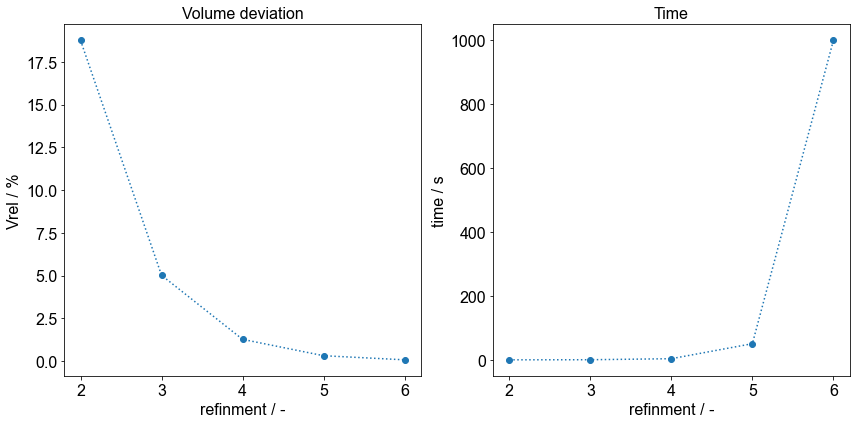

In [4]:
'''
Plot the data
'''
fig, ax = plot.subplots(nrows=1, ncols=2, figsize=(12, 6))


ax[0].plot(refinement_list, v_rel_list,"o:",color="tab:blue")
ax[1].plot(refinement_list, time_list,"o:",color="tab:blue")


ax[0].set_title('Volume deviation')
ax[1].set_title('Time')

ax[0].set_ylabel("Vrel / %")
ax[1].set_ylabel("time / s")

ax[0].set_xlabel("refinment / -")
ax[1].set_xlabel("refinment / -")

plt.tight_layout()
plt.savefig("volume_refinment_validation.png")
